# Generating data for a simple recall task

In [1]:
# imports n stuff
import seaborn as sns
%matplotlib inline
from hardworking_memory import *
from utils import *

## Specifying the common parameters (between match and nomatch conditions)

In [2]:
frange = (1, 20, 2) # range of frequencies to be used (min, max, step)
n_events = 3        # number of events per stimulus
t_events = 100      # duration of each event, so each duration of stimulus = t_events*n_events
t_response = 100    # duration of response
t_delay = 200       # duration of delay between source stimulus and target stimulus
y_labels = ["Signal","Cue", "Correct response", "Condition's cue"]
source_generator_kw = {"function": make_step, # easier to see compared to make_sin
                       "function_kw": {"event_duration": t_events},
                       "frequencies":None}
target_generator_kw = source_generator_kw.copy()

trial_kw = {"source_generator":make_stimulus,
            "source_generator_kw":source_generator_kw,
            "target_generator":make_stimulus,
            "target_generator_kw":target_generator_kw,
            "t_response":t_response,
            "t_silence":t_delay,
            "global_noise":.0}

## Specifying condition specific parameters
The transformation here is scale_one_off that randomly changes the frequency of one event in the target signal. The new frequency is from the same frequency range. retrograde is False, which means the temporal order of target signal follows the source (it's not reveresed in time).

There will be 4 rows:


    1. the signal itself
    2. cue signal
    3. the correct response (match = 1, nomatch = -1)
    4. condition cue (recall = -1, wm = 1) 

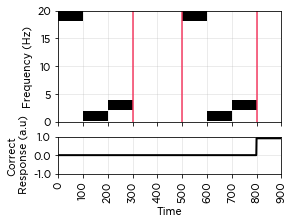

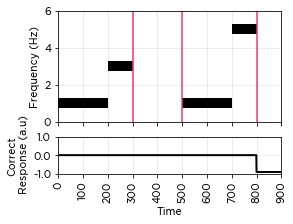

In [3]:
fix_random_seed(11)
stylize()
match_frequencies = template_generator(n_trials = 60,
                                       transformation = None,
                                       frequency_range=frange,
                                       retrograde = False)

nomatch_frequencies = template_generator(n_trials = 40,
                                         transformation = scale_one_off,
                                         frequency_range = frange,
                                         transformation_kw= {"frequency_range":frange},
                                         retrograde = False)

match_fig = simplified_trial_plotter(match_frequencies[0],
                               t_delay=t_delay,
                               t_response=t_response,
                               t_events=t_events,
                               is_match=True,
                               figsize=(4,3))

nomatch_fig = simplified_trial_plotter(nomatch_frequencies[0],
                               t_delay=t_delay,
                               t_response=t_response,
                               t_events=t_events,
                               is_match=False,
                               figsize=(4,3))

## Generating match conditions

In [4]:
match_block = experiment_generator(frequency_mat = match_frequencies,
                                   trial_generator = trial_generator,
                                   trial_generator_kw = trial_kw,
                                   is_wm=False,
                                   is_match=True,
                                   is_3d=True)

if source_generator_kw["function"] is make_step:
    match_block = normalize_step_signal(match_block,frange[1])

(4, 60, 900)


<AxesSubplot:>

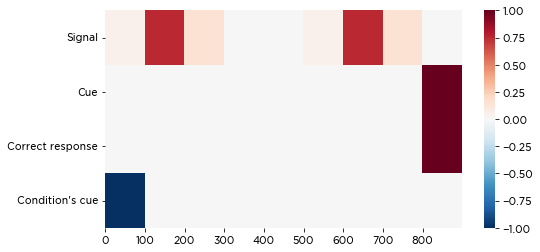

In [5]:
print(match_block.shape)
plt.figure(figsize=(8,4))
sns.heatmap(data = match_block[:,-1,:],
            center = 0,
            xticklabels=100,
            yticklabels=y_labels,
            cmap='RdBu_r')

## Generate no match conditions

(4, 40, 900)


<AxesSubplot:>

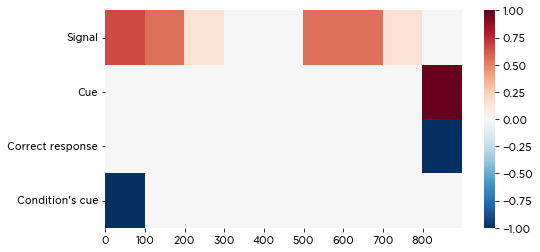

In [6]:
nomatch_block = experiment_generator(frequency_mat = nomatch_frequencies,
                                     trial_generator = trial_generator,
                                     trial_generator_kw = trial_kw,
                                     is_wm=False,
                                     is_match=False,
                                     is_3d=True)

if source_generator_kw["function"] is make_step:
    nomatch_block = normalize_step_signal(nomatch_block,frange[1])

print(nomatch_block.shape)
plt.figure(figsize=(8,4))
sns.heatmap(data = nomatch_block[:,-1,:],
            center = 0,
            xticklabels=100,
            yticklabels=y_labels,
            cmap='RdBu_r')

## Preparing the experiment

<AxesSubplot:>

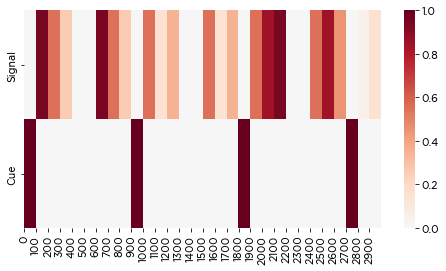

In [7]:
fix_random_seed(11)
sk_kw = {"test_size": .4, "shuffle":False}
X_train, X_test, y_train, y_test = train_test_preprocessor(match_block = match_block,
                                                          nomatch_block = nomatch_block,
                                                          **sk_kw)

plt.figure(figsize=(8,4))

sns.heatmap(data = X_train[2600:5600].T,
            center = 0,
            xticklabels=100,
            yticklabels=["Signal", "Cue"],
            cmap='RdBu_r')

<AxesSubplot:>

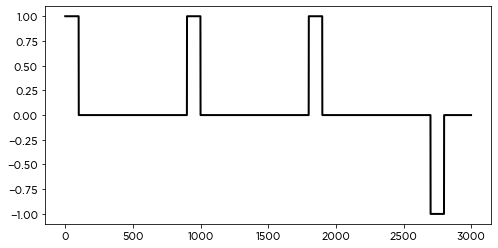

In [8]:
plt.figure(figsize=(8,4))
# plt.plot(y_train[2600:5600], linewidth = 2, color = 'k')
sns.lineplot(data = y_train[2600:5600],linewidth = 2, color = 'k')

In [9]:
print(f"X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}\n")
print(f"number of nomatch conditions in the training dataset: {int(np.count_nonzero(y_train == -1)/t_response)}")
print(f"number of nomatch conditions in the test dataset: {int(np.count_nonzero(y_test == -1)/t_response)}\n")
print(f"number of match conditions in the training dataset: {int(np.count_nonzero(y_train == 1)/t_response)}")
print(f"number of match conditions in the test dataset: {int(np.count_nonzero(y_test == 1)/t_response)}")

X_train: (54000, 2)
X_test: (36000, 2)
y_train: (54000,)
y_test: (36000,)

number of nomatch conditions in the training dataset: 25
number of nomatch conditions in the test dataset: 15

number of match conditions in the training dataset: 35
number of match conditions in the test dataset: 25
